<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-and-setup-functions" data-toc-modified-id="Imports-and-setup-functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and setup functions</a></span></li><li><span><a href="#Read-netCDF-files" data-toc-modified-id="Read-netCDF-files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read netCDF files</a></span><ul class="toc-item"><li><span><a href="#Methods" data-toc-modified-id="Methods-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Methods</a></span></li><li><span><a href="#Test:-Read-data-from-January,-February-2021" data-toc-modified-id="Test:-Read-data-from-January,-February-2021-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Test: Read data from January, February 2021</a></span></li><li><span><a href="#Get-data-from-masked-array" data-toc-modified-id="Get-data-from-masked-array-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Get data from masked array</a></span><ul class="toc-item"><li><span><a href="#Surface-temperature" data-toc-modified-id="Surface-temperature-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Surface temperature</a></span></li><li><span><a href="#Invalid-values" data-toc-modified-id="Invalid-values-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Invalid values</a></span></li></ul></li></ul></li><li><span><a href="#Choose-window-over-geographic-area" data-toc-modified-id="Choose-window-over-geographic-area-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Choose window over geographic area</a></span></li></ul></div>

# Imports and setup functions

In [2]:
import os
from matplotlib import pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray

In [3]:
def dataDir(x):
    cwd = os.getcwd()
    
    return cwd + "/data/" + x

# Read netCDF files

## Methods

In [4]:
def create_month_dataset(year_path, exclude=[]):
    
    # |data/
    # |--- |SST_ATL_PHY.../
    # |----|-------------- |2021/
    # |----|---------------|--- |01/
    # |----|---------------|----|- 20210101_image.nc  # (day 1)
    # |----|---------------|----|- 20210102_image.nc  # (day 2)
    # |----|---------------|----|- 20210103_image.nc  # (day 3) ...
    
    dataset = {}
    
    m_paths = [year_path + m for m in os.listdir(year_path)]
    m_paths.sort()
    
    print("Creating dataset from year: " + year_path[-5:-1] + "...")
    
    for m in m_paths:
        
        # Create ID
        m_id = "sst_" + year_path[-5:-1] + "-" + m[-2:]
        
        # Read data into MFDataset
        print("...Month: " + m[-2:] + "...")
        
        m_nc = nc.MFDataset(files=(m + "/*.nc"), aggdim="time", 
                            exclude=exclude)
       
        # Save to dictionary with datasets
        dataset[m_id] = m_nc
        
    return dataset

## Test: Read data from January, February 2021

In [9]:
depth = nc.Dataset(dataDir("GLOBAL_ANALYSISFORECAST_PHY_001_024/2021/01/glo12_rg_1d-m_20210101-20210101_3D-thetao_hcst_R20210113.nc"))
depth["depth"]

<class 'netCDF4._netCDF4.Variable'>
float32 depth(depth)
    valid_min: 0.494025
    valid_max: 5727.917
    units: m
    positive: down
    unit_long: Meters
    long_name: Depth
    standard_name: depth
    axis: Z
unlimited dimensions: 
current shape = (50,)
filling off

In [10]:
vars_to_exclude = ["longitude", "latitude", "depth", "time"]

test = create_month_dataset(dataDir("GLOBAL_ANALYSISFORECAST_PHY_001_024/2021/"),
                            vars_to_exclude)

Creating dataset from year: 2021...
...Month: 01...
...Month: 02...


In [11]:
test["sst_2021-01"]["thetao"].shape

(2, 50, 2041, 4320)

In [12]:
test["sst_2021-01"]

<class 'netCDF4._netCDF4.MFDataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    producer: CMEMS - Global Monitoring and Forecasting Centre
    title: daily mean fields from Global Ocean Physics Analysis and Forecast updated Daily
    area: Global
    Conventions: CF-1.8
    credit: E.U. Copernicus Marine Service Information (CMEMS)
    contact: https://marine.copernicus.eu/contact
    references: http://marine.copernicus.eu
    source: MOI GLO12
    licence: http://marine.copernicus.eu/services-portfolio/service-commitments-and-licence/
    institution: Mercator Ocean International
    dimensions = ('longitude', 'latitude', 'depth', 'time')
    variables = ('longitude', 'latitude', 'depth', 'time', 'thetao')
    groups = ()

## Get data from masked array 

### Surface temperature

In [15]:
def get_surface_temp(data):
    """Method to extract the first level of depth for which there is data.
        
       Parameters
       ----------
       data : numpy.ndarray or numpy.ma.core.MaskedArray
    
    """
    data_c = data.copy
    
    return data_c["thetao"][:, 0, :, :]

In [17]:
test["sst_2021-01"]["thetao"].shape

(2, 50, 2041, 4320)

In [ ]:
test_surface = get_surface_temp(test["sst_2021-01"]["thetao"][0])

In [ ]:
test_reverse = test["sst_2021-01"]["thetao"][0][::-1, ::-1]

In [1]:
test_surface.shape

NameError: name 'test_surface' is not defined

In [37]:
test_surface

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [-1.6020889282226562, -1.6020846366882324, -1.6020804643630981,
          ..., -1.6021026372909546, -1.6020978689193726,
          -1.60209321975708],
         [-1.601487636566162, -1.6014870405197144, -1.6014862060546875,
          ..., -1.601489782333374, -1.6014890670776367,
          -1.6014882326126099],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [-1.6041874885559082, -1.6041854619979858, -1.6041836738586426,
          ..., -1.6041934490203857, -1.6041914224624634,
          -1.6041895151138306],
         [-1.606079339981079, -1.6060655117034912, -1.6060515642166138,
          ..., -1.6061214208602905, -1.6061073541641235,
          -1.606093406677246],
         [--, --, --, ..., --, --,

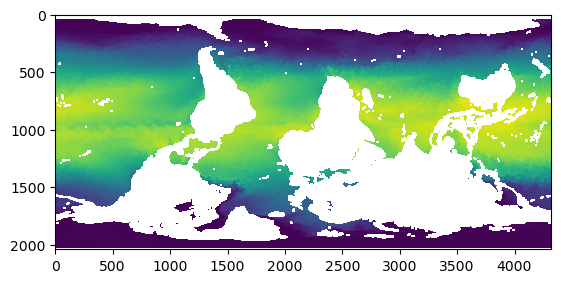

In [38]:
plt.imshow(test_surface[0])

In [ ]:
test_sst_ma = test["sst_2021-01"]["thetao"][0,] # just January 1st
print(type(test_sst_ma))
print(test_sst_ma.shape)

In [86]:
# Computations on masked arrays don't use the masked (invalid) values

print(test_sst_ma.mean())  
print(test_sst_ma.data.mean())

288.92737490621766
-25061.09674607625


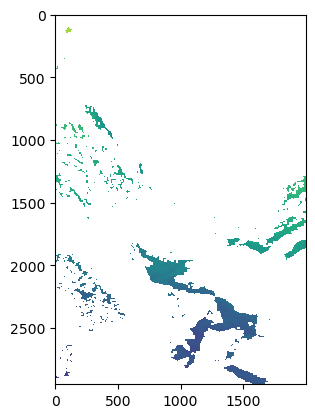

In [87]:
plt.imshow(test_sst_ma)

### Invalid values

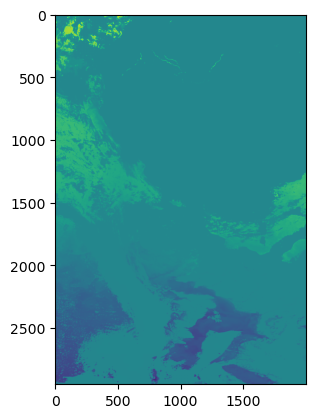

In [91]:
test_sst_filled = test_sst_ma.filled(test_sst_ma.mean())  # fill with mean
plt.imshow(test_sst_filled)

In [12]:
# TODO: to retain the position of the slices (so can repeat for lat/lon data)
#       add another return to the method: the indices of the slices   

def get_valid_slices_ma(data, threshold=0.5, window_size=256, step=100):
    """Method to slice one image into smaller images of a given window size, 
       provided that the missing data in the slice does not exceed the given 
       threshold (%).
    """
    
    candidates = []
    m = data.shape[0]
    n = data.shape[1]
    
    row = 0
    col = 0
    
    while row < m:
        while col < n:
            
            cand = data[row:row+window_size, col:col+window_size]
            
            if (cand.mask.sum() <= threshold*(window_size**2)) & (cand.shape == (256,256)):
                candidates.append(cand)
                #print(cand.shape)
                #print(type(cand))
                
            col += step
        
        row += step
        col = 0
    
    #for i in range(m+1):
        # cand = data[i:window_size+i]
        # cand = data[i:i+window_size,:].reshape((-1,1))
        
        #if cand.mask.sum() <= invalid_threshold*(window_size**2):        
            #candidates.append(np.expand_dims(cand, 0))
            #print(cand.shape)
            
        #else:
            #pass
    
    return np.ma.masked_array(candidates) #np.vstack(candidates)

In [15]:
test_sst_ma.shape

(2950, 2000)

In [13]:
test_slices = get_valid_slices_ma(test_sst_ma, threshold=0.1, step=100) # threshold=0.25
print(test_slices.shape)
print(type(test_slices))

(7, 256, 256)
<class 'numpy.ma.core.MaskedArray'>


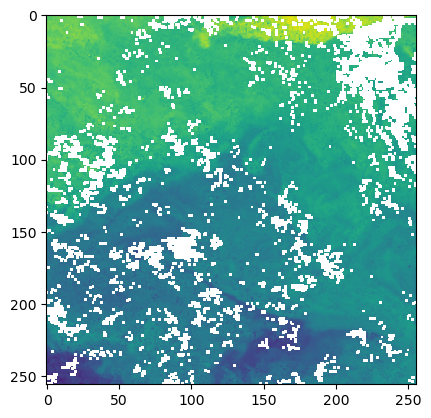

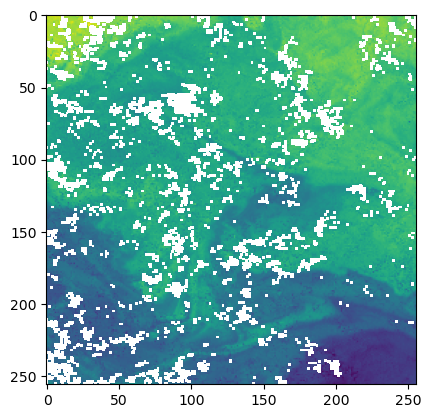

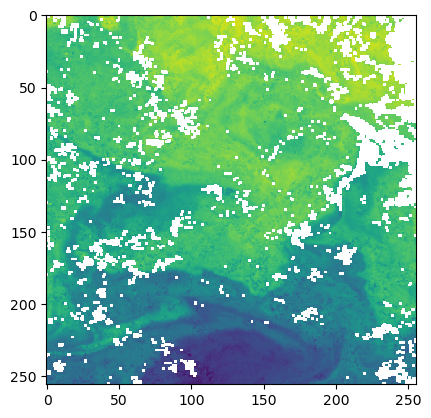

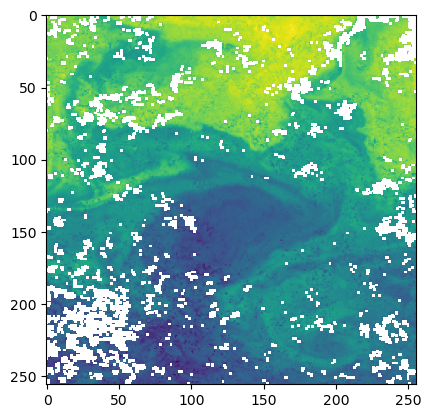

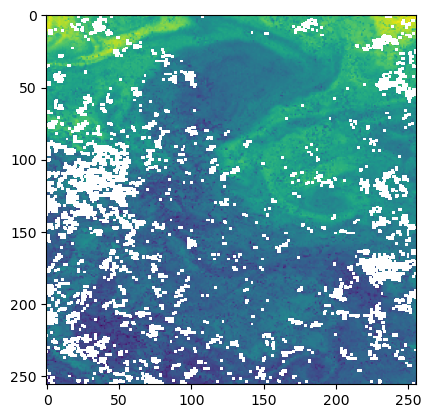

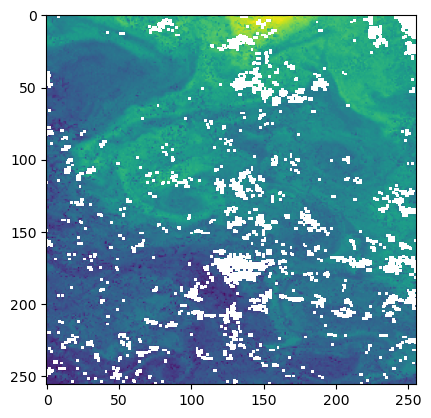

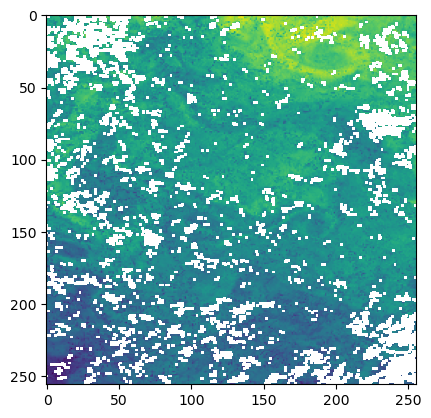

In [14]:
for img in test_slices:
    #print(img.mean())   
    plt.imshow(img)
    plt.show()

In [ ]:
# TODO: how to retain lat/lon information for each candidate image? 
#       need to ensure consistent geographic area over time for training
#       add another return to the method: list of indices for valid slices

# Choose window over geographic area

In [7]:
def slice_images_by_geo(img, latmin, latmax, lonmin, lonmax, 
                        var="sea_surface_temperature", end_shape=(256, 256)):
    
    lat, lon = img.variables['lat'][:], img.variables['lon'][:]
    v = img.variables[var][:]
    
    lat_mask = np.where((lat < latmax) & (lat > latmin), True, False)
    lon_mask = np.where((lon < lonmax) & (lon > lonmin), True, False)
    
    var_slice = []
    
    for m in range(len(v)):
        var_slice.append(v[m,][lat_mask,:][:,lon_mask])

    return np.ma.masked_array(var_slice)

In [8]:
test_slices2 = slice_images_by_geo(test["sst_2021-06"], latmin=45, latmax=50.5, lonmin=-20.5, lonmax=-15)
print(test_slices2.shape)

(30, 275, 275)


In [9]:
print(test_slices2.min())
print(test_slices2.max())
print(test_slices2.mean())

282.75
291.44
287.7358675376873


In [10]:
test_slices2[:,][:256,:256].shape #[:,:256].shape # 30x256x256

(30, 256, 275)

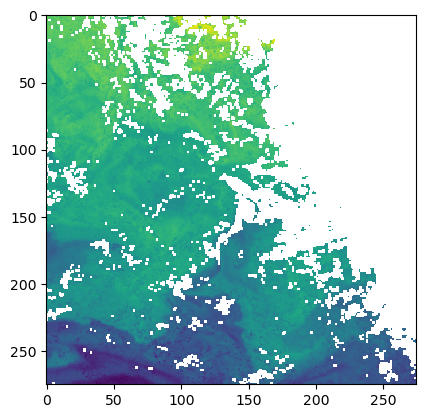

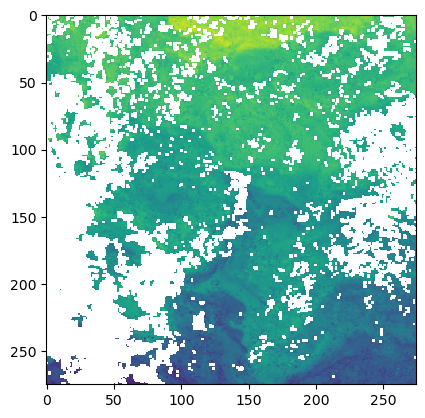

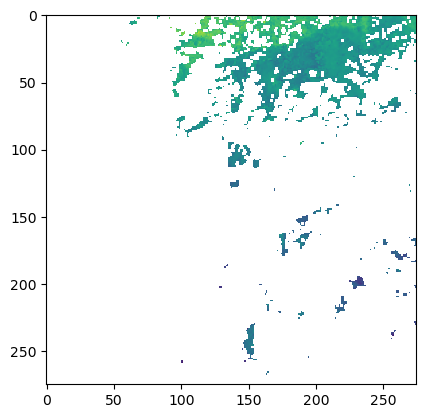

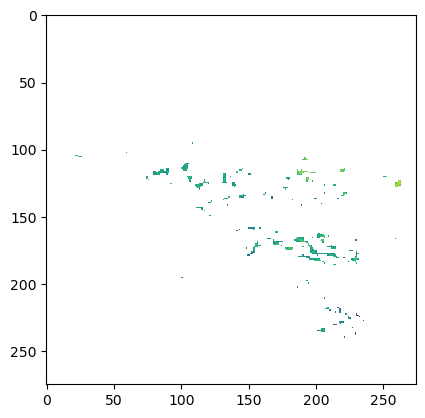

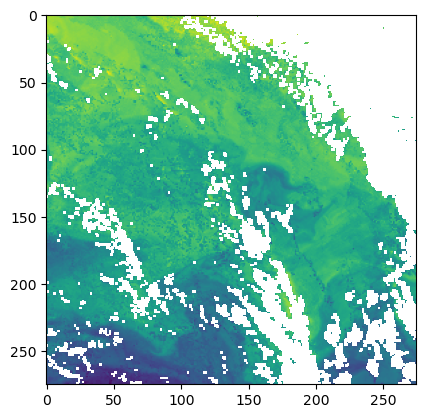

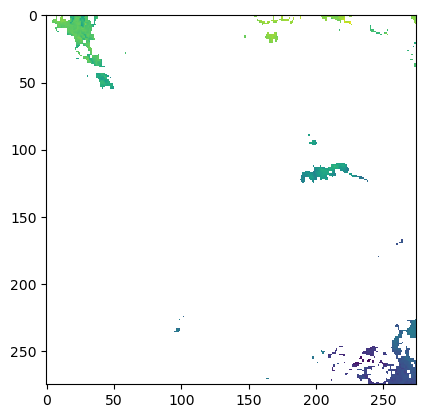

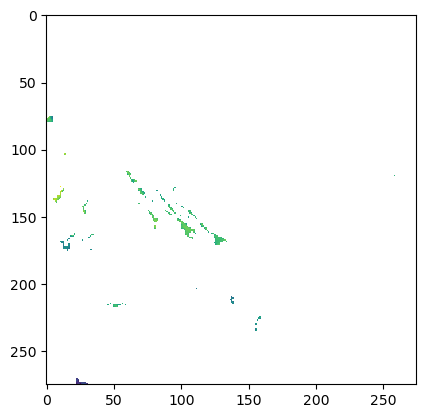

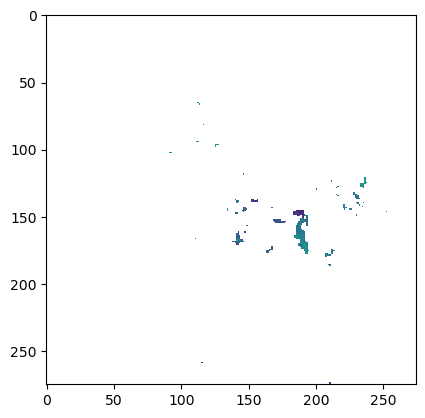

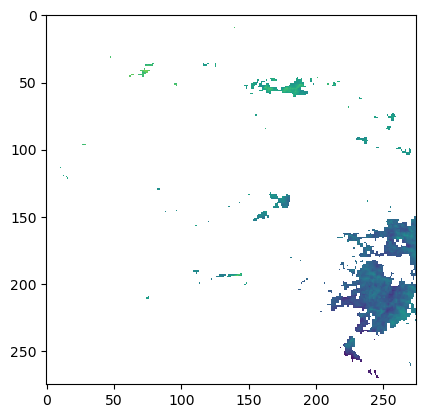

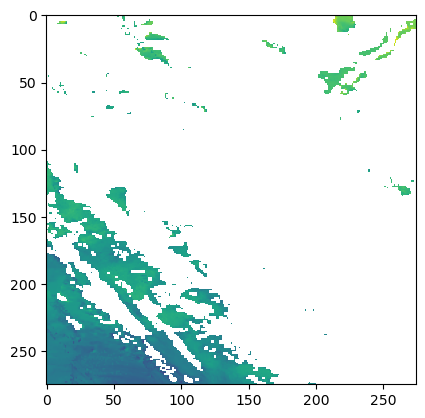

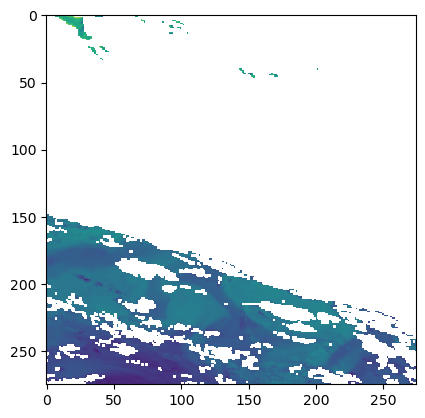

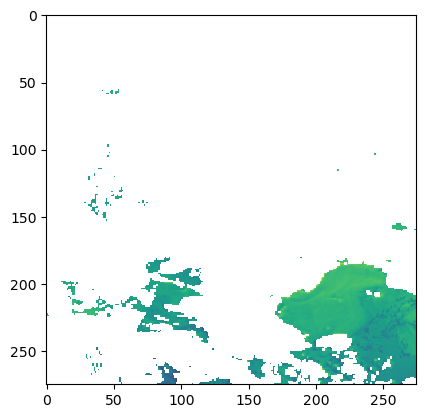

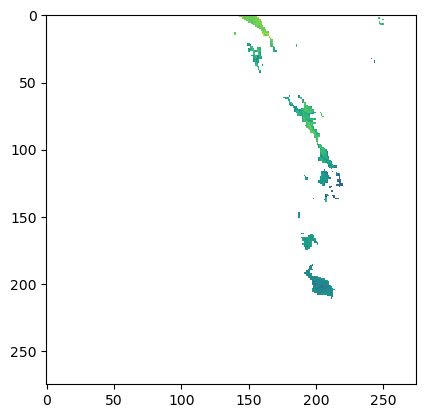

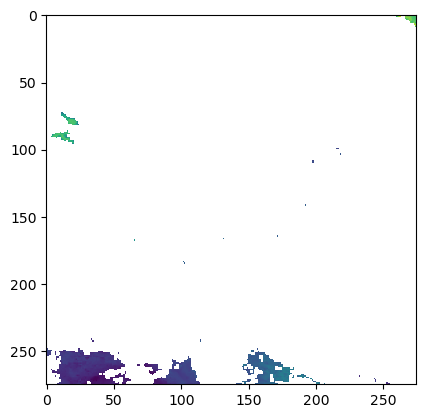

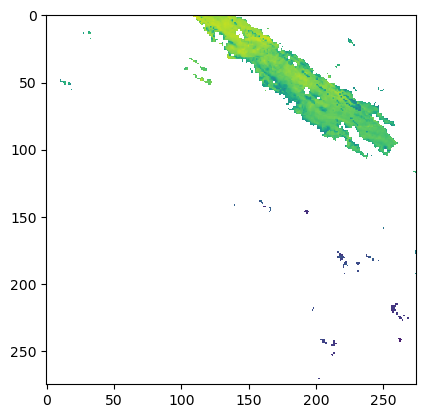

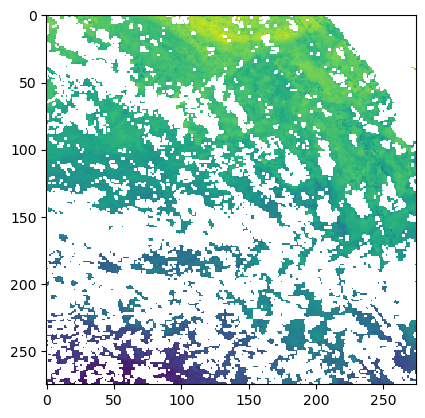

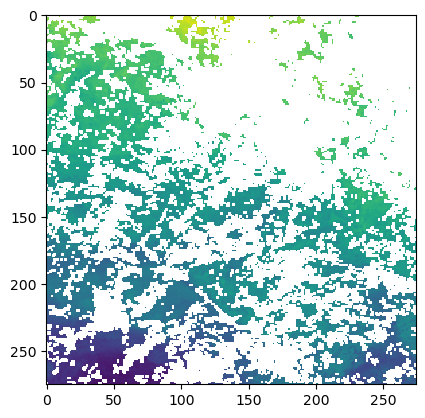

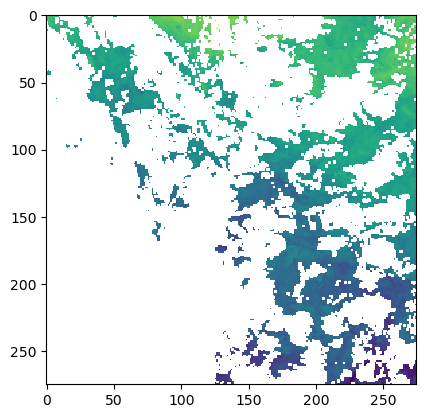

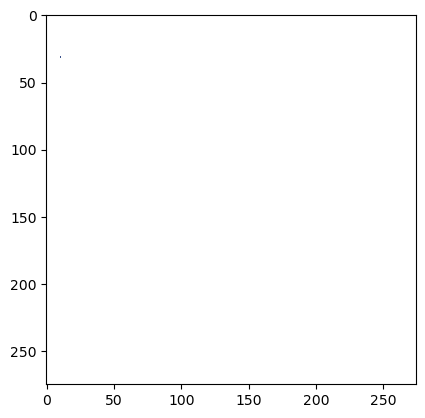

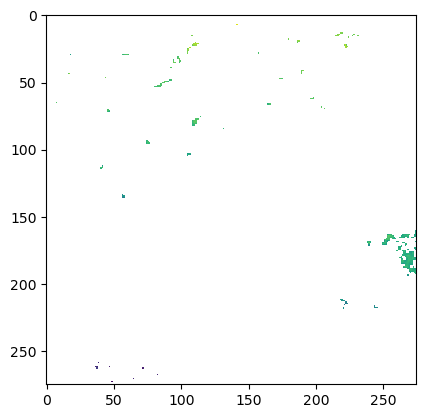

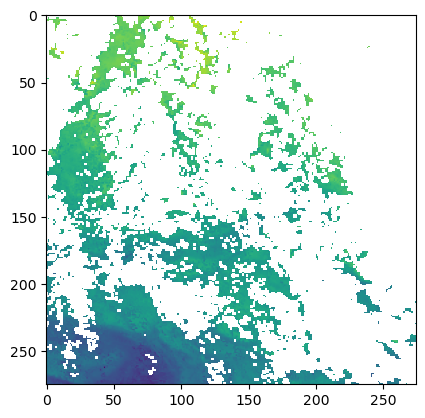

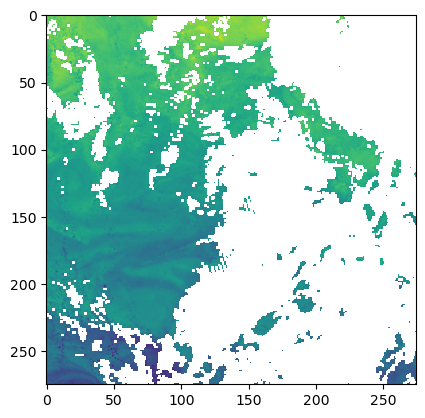

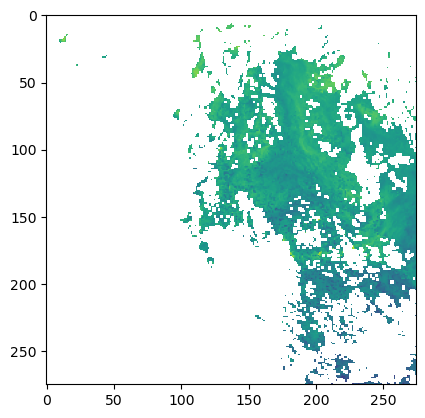

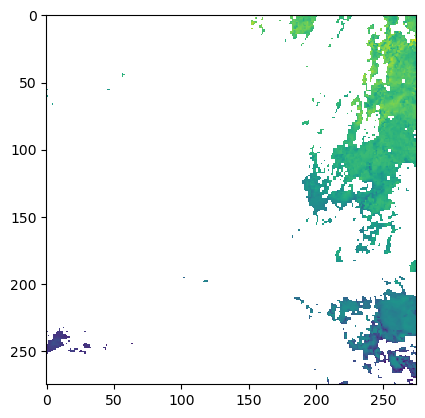

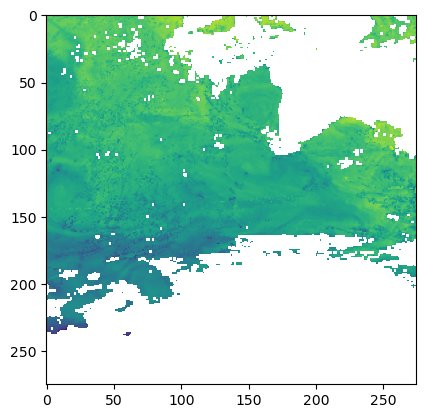

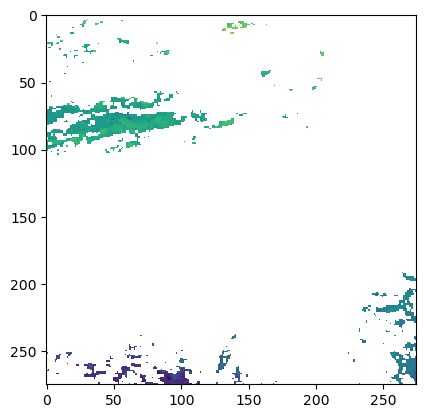

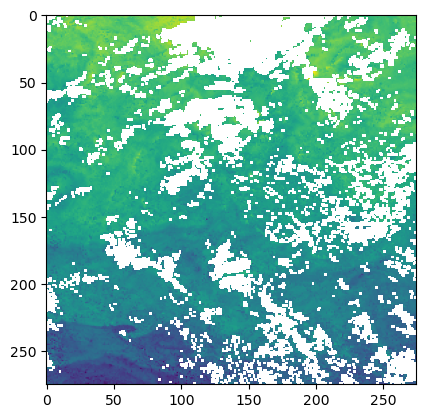

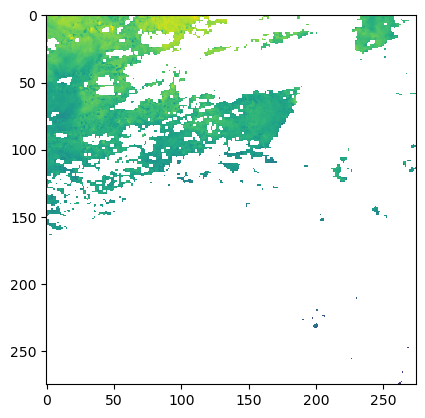

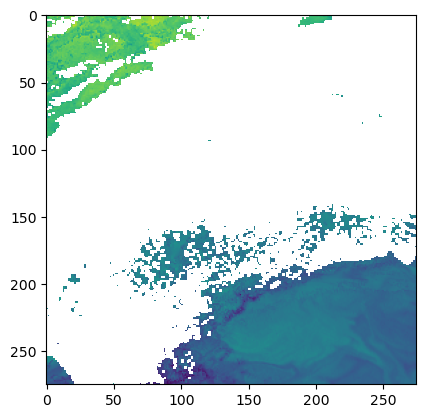

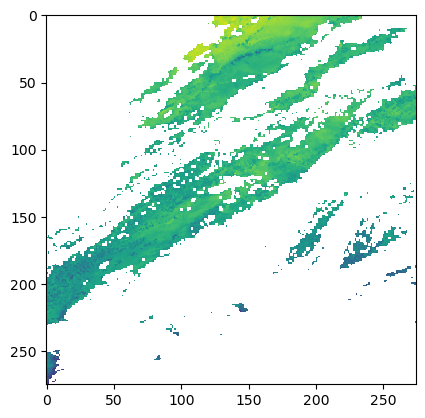

In [11]:
#june1 = sst[0,] # the snapshot of the first of June 
#plt.imshow(june1)

for i in range(len(test_slices2)):
    plt.imshow(test_slices2[i,])
    plt.show()

In [ ]:
# TODOs:
# 1. Investigate why some values were masked - missing data? incorrect measurements?
# 2. Load extracted numeric values into PyTorch Dataset
#    Link: https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset
# 3. Clean up imports
# 4. Convert units from K to degrees C

https://www.youtube.com/@climateunboxed/videos

https://www.earthinversion.com/utilities/reading-NetCDF4-data-in-python/

https://stackoverflow.com/questions/36360469/read-nc-netcdf-files-using-python

https://unidata.github.io/netcdf4-python/#creatingopeningclosing-a-netcdf-file

https://marine.copernicus.eu/user-corner/user-notification-service/gh-416-technical-issue-impacting-new

https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/use-netcdf-in-python-xarray/

https://docs.xarray.dev/en/stable/generated/xarray.open_mfdataset.html

https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

Data sources:
1. https://data.marine.copernicus.eu/product/GLOBAL_ANALYSISFORECAST_PHY_001_024/description
2. https://help.marine.copernicus.eu/en/articles/4521873-how-to-download-a-dataset-from-ftp-server
4. https://catalogue.marine.copernicus.eu/documents/PUM/CMEMS-GLO-PUM-001-024.pdf